In [1]:
!pip install einsteinpy

     |████████████████████████████████| 112kB 7.4MB/s 


In [30]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

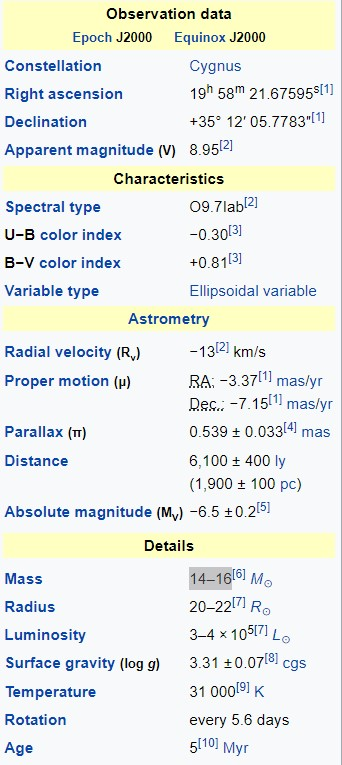

# So mass of Cygnus X1 is 16 Solar mass = 3.182e+31

## Plotting Spacial Hypersurface Embedding for Schwarzschild Space-Time for Cygnus X1

In [3]:
from einsteinpy.hypersurface import SchwarzschildEmbedding
from einsteinpy.plotting import HypersurfacePlotter
from astropy import units as u

In [13]:
surface_obj = SchwarzschildEmbedding(3.182e+31 * u.kg)

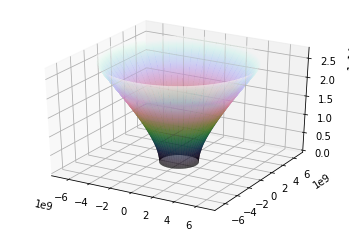

In [14]:
surface = HypersurfacePlotter(embedding=surface_obj, plot_type='surface')
surface.plot()
surface.show()

## Shadow cast by an thin emission disk around Cygnus X1

In [25]:
from einsteinpy.utils import kerr_utils, schwarzschild_radius

In [26]:
M = 3.182e+31
scr = schwarzschild_radius(M * u.kg).value
# for nearly maximally rotating black hole
a1 = 0.499999*scr
# for ordinary black hole
a2 = 0.3*scr

#### Calculating the ergosphere and event horizon for spherical coordinates

In [27]:
ergo1, ergo2, hori1, hori2 = list(), list(), list(), list()
thetas = np.linspace(0, np.pi, 720)
for t in thetas:
    ergo1.append(kerr_utils.radius_ergosphere(M, a1, t, "Spherical"))
    ergo2.append(kerr_utils.radius_ergosphere(M, a2, t, "Spherical"))
    hori1.append(kerr_utils.event_horizon(M, a1, t, "Spherical"))
    hori2.append(kerr_utils.event_horizon(M, a2, t, "Spherical"))
ergo1, ergo2, hori1, hori2 = np.array(ergo1), np.array(ergo2), np.array(hori1), np.array(hori2)

#### Calculating the X, Y coordinates for plotting

In [28]:
Xe1, Ye1 = ergo1[:,0] * np.sin(ergo1[:,1]), ergo1[:,0] * np.cos(ergo1[:,1])
Xh1, Yh1 = hori1[:,0] * np.sin(hori1[:,1]), hori1[:,0] * np.cos(hori1[:,1])
Xe2, Ye2 = ergo2[:,0] * np.sin(ergo2[:,1]), ergo2[:,0] * np.cos(ergo2[:,1])
Xh2, Yh2 = hori2[:,0] * np.sin(hori2[:,1]), hori2[:,0] * np.cos(hori2[:,1])

#### Maximally Rotating

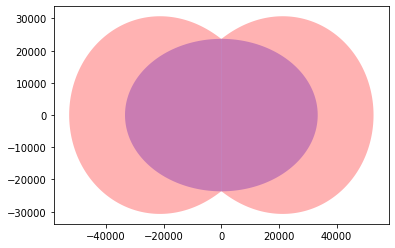

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# for maximally rotating black hole
ax.fill(Xh1, Yh1, 'b', Xe1, Ye1, 'r', alpha=0.3)
ax.fill(-1*Xh1, Yh1, 'b', -1*Xe1, Ye1, 'r', alpha=0.3)

#### Normally Rotating

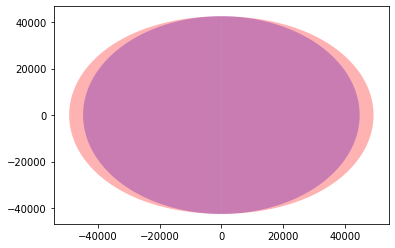

In [36]:
%matplotlib inline
fig, ax = plt.subplots()
ax.fill(Xh2, Yh2, 'b', Xe2, Ye2, 'r', alpha=0.3)
ax.fill(-1*Xh2, Yh2, 'b', -1*Xe2, Ye2, 'r', alpha=0.3)

# The inner body represents event horizon and outer one represents ergosphere. It can be concluded that with decrease in angular momentum, radius of event horizon increases, and that of ergosphere decreases.

# 